In [1]:
from __future__ import division
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./conjunto_de_datos/defun15.tar.gz')
df.head()

,defun15.CSV,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,...,2015.0,NaN,2.0,2.0,88.0,88.0,888.0,8888.0,0.0,999.0
1,1.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,...,2015.0,NaN,9.0,1.0,88.0,88.0,888.0,8888.0,0.0,999.0
2,1.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,...,2015.0,NaN,9.0,1.0,88.0,88.0,888.0,8888.0,0.0,999.0
3,1.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,...,2015.0,NaN,2.0,1.0,88.0,88.0,888.0,8888.0,0.0,999.0
4,1.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,15.0,1.0,...,2015.0,NaN,2.0,2.0,88.0,88.0,888.0,8888.0,0.0,999.0


In [37]:
df1 = df[df.ent_ocurr == 8][df.lista_mex == '55'][[ 'mun_ocurr']]
df1.head()

/home/alejandro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,mun_ocurr
77505,37.0
77507,37.0
77512,37.0
77513,37.0
77514,37.0


In [38]:
df1['TOTAL'] = 1
df1.head()

,mun_ocurr,TOTAL
77505,37.0,1
77507,37.0,1
77512,37.0,1
77513,37.0,1
77514,37.0,1


In [35]:
df2 = df1.groupby(['mun_ocurr'], sort=False).count().reset_index()
df2 = df2.sort_values(['mun_ocurr']).reset_index()[['mun_ocurr','TOTAL']]
df2

,mun_ocurr,TOTAL
0,1.0,12
1,2.0,10
2,3.0,2
3,4.0,4
4,5.0,13
5,7.0,16
6,8.0,21
7,9.0,36
8,10.0,3
9,11.0,15


In [45]:
aux = pd.read_csv('in.csv')
aux.head()

,inx,tot
0,1,12
1,2,10
2,3,2
3,4,4
4,5,13


In [27]:
import geopandas as gpd
%matplotlib inline
mexico = gpd.read_file('./Map/MEX_adm2.shp')
mexico.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,145,MEX,Mexico,1,Aguascalientes,1,Aguascalientes,MX.AG.AG,0,,Municipio,Municipality,,,POLYGON ((-102.4479904174804 21.66107177734369...
1,145,MEX,Mexico,1,Aguascalientes,2,Asientos,MX.AG.AS,0,,Municipio,Municipality,,,POLYGON ((-102.2290115356445 22.04062080383306...
2,145,MEX,Mexico,1,Aguascalientes,3,Calvillo,MX.AG.CA,0,,Municipio,Municipality,,,POLYGON ((-102.6130294799805 21.72298049926758...
3,145,MEX,Mexico,1,Aguascalientes,4,Cosío,MX.AG.CO,0,,Municipio,Municipality,,Cosio,POLYGON ((-102.2536773681641 22.34621047973638...
4,145,MEX,Mexico,1,Aguascalientes,5,Jesús María,MX.AG.JM,0,,Municipio,Municipality,,Jesus Maria,"POLYGON ((-102.5781478881835 21.7703094482423,..."


In [51]:
Chi = mexico[mexico.NAME_1 == 'Chihuahua']
Chi['hom'] = list(aux.tot)
Chi

/home/alejandro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,hom
134,145,MEX,Mexico,6,Chihuahua,135,Ahumada,MX.CH.AH,0,,Municipio,Municipality,,Villa Ahumada,POLYGON ((-105.9333801269531 29.67786026000982...,12
135,145,MEX,Mexico,6,Chihuahua,136,Aldama,MX.CH.AD,0,,Municipio,Municipality,,,POLYGON ((-105.9333801269531 29.67786026000982...,10
136,145,MEX,Mexico,6,Chihuahua,137,Allende,MX.CA.AL,0,,Municipio,Municipality,,Valle de Allende,POLYGON ((-105.1812286376952 27.24701118469238...,2
137,145,MEX,Mexico,6,Chihuahua,138,Aquiles Serdán,MX.CH.AQ,0,,Municipio,Municipality,,Aquiles Serdan,"POLYGON ((-105.972785949707 28.73961067199713,...",4
138,145,MEX,Mexico,6,Chihuahua,139,Ascensión,MX.CH.AS,0,,Municipio,Municipality,,Ascension,"POLYGON ((-106.6832809448242 31.1227912902832,...",13
139,145,MEX,Mexico,6,Chihuahua,140,Bachíniva,MX.CH.BC,0,,Municipio,Municipality,,Bachiniva,POLYGON ((-107.2157669067382 28.67960166931158...,0
140,145,MEX,Mexico,6,Chihuahua,141,Balleza,MX.CH.BL,0,,Municipio,Municipality,,,"POLYGON ((-106.1417999267578 26.8395404815675,...",16
141,145,MEX,Mexico,6,Chihuahua,142,Batopilas,MX.CH.BT,0,,Municipio,Municipality,,,POLYGON ((-107.9900131225586 26.74259185791027...,21
142,145,MEX,Mexico,6,Chihuahua,143,Bocoyna,MX.CH.BO,0,,Municipio,Municipality,,,POLYGON ((-107.4883422851562 28.08508110046392...,36
143,145,MEX,Mexico,6,Chihuahua,144,Buenaventura,MX.CH.BU,0,,Municipio,Municipality,,,POLYGON ((-106.6392822265624 29.74773979187017...,3


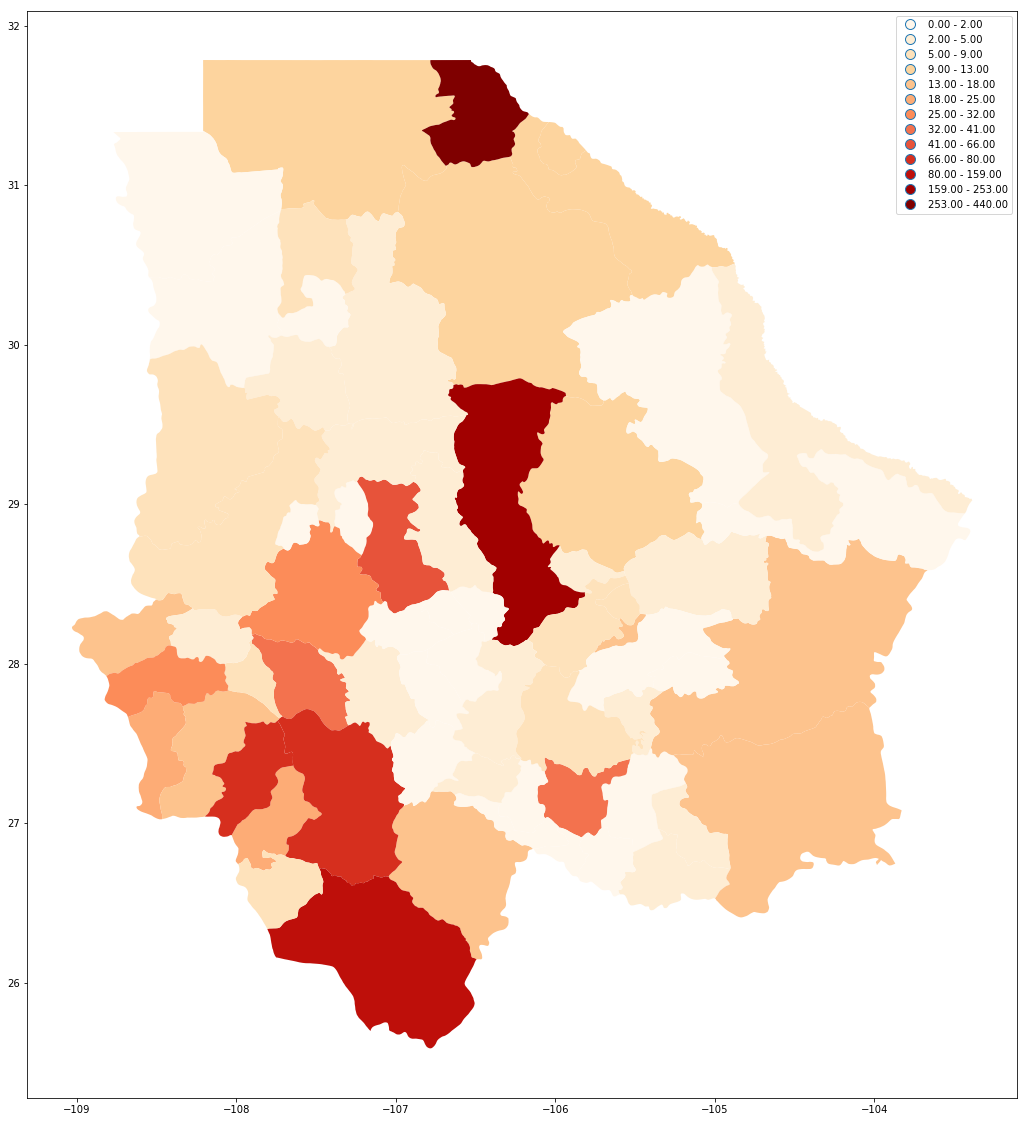

In [57]:
Chi.plot(column='hom', cmap='OrRd', figsize=(26,20), legend=True, k= 13, scheme='fisher_jenks')